<a href="https://colab.research.google.com/github/nishita339/machine-learning-projects/blob/main/WhatsApp_Chat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [4]:
# Install missing dependency
!pip install emoji
import emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.6 MB/s eta 0:00:00


In [32]:
# Load the WhatsApp chat file
file_path = '/content/WhatsApp Chat with ~😁.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

In [33]:
# Remove encryption notification messages
chat_data = [line for line in chat_data if 'Messages and calls are end-to-end encrypted' not in line]

In [34]:
# Regex pattern to extract date, time, sender, and message
pattern = r'(?P<Date>\d{1,2}/\d{1,2}/\d{2,4}), (?P<Time>\d{1,2}:\d{2}\s[ap]m) - (?P<Sender>.*?): (?P<Message>.*)'


In [35]:
# Parse chat into DataFrame
data = []
for line in chat_data:
    match = re.match(pattern, line)
    if match:
        data.append(match.groups())

In [36]:
# Convert to DataFrame
chat_df = pd.DataFrame(data, columns=['Date', 'Time', 'Sender', 'Message'])
chat_df['Date'] = pd.to_datetime(chat_df['Date'], dayfirst=True)

<ipython-input-36-aea5f7115b73>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chat_df['Date'] = pd.to_datetime(chat_df['Date'], dayfirst=True)


In [37]:
# Remove media messages
chat_df = chat_df[~chat_df['Message'].str.contains('<Media omitted>')]

In [38]:
# Convert Time to datetime format
chat_df['Time'] = pd.to_datetime(chat_df['Time'], format='%I:%M %p').dt.time

<ipython-input-39-9a4f991ea6b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=chat_df['Sender'], order=chat_df['Sender'].value_counts().index, palette='coolwarm')


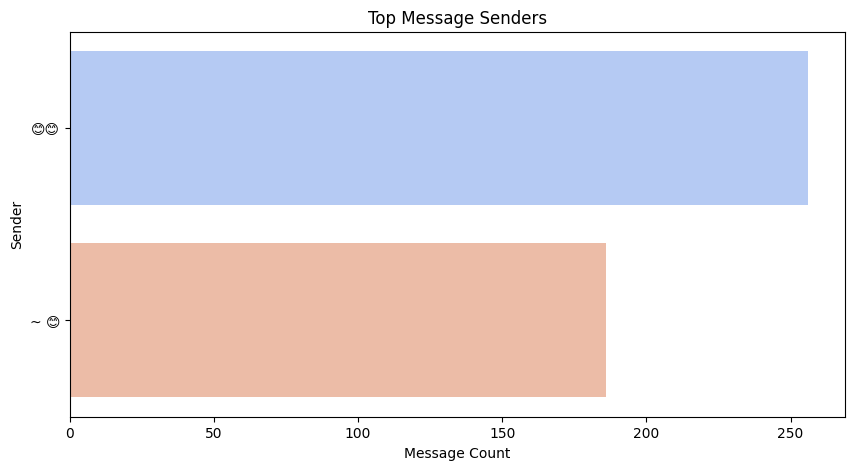

In [39]:
# Plot Message Frequency by Sender
plt.figure(figsize=(10,5))
sns.countplot(y=chat_df['Sender'], order=chat_df['Sender'].value_counts().index, palette='coolwarm')
plt.title('Top Message Senders')
plt.xlabel('Message Count')
plt.ylabel('Sender')
plt.show()

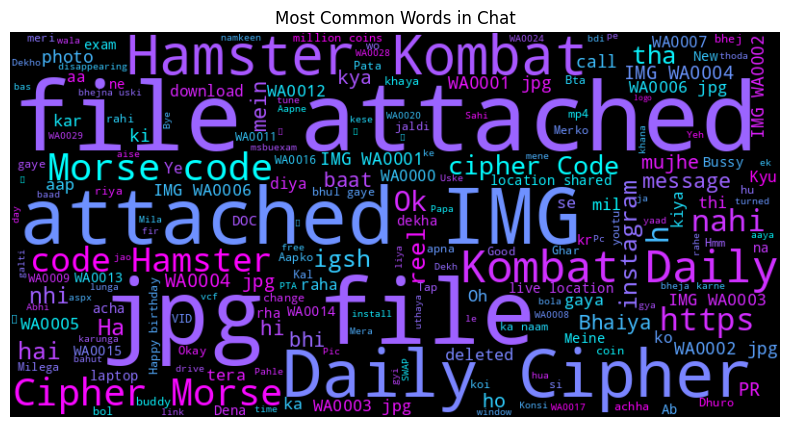

In [40]:
# Generate Word Cloud
all_words = ' '.join(chat_df['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='cool').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Chat')
plt.show()

In [41]:
# Extract Emojis from Messages
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA.keys())

chat_df['Emojis'] = chat_df['Message'].apply(extract_emojis)
all_emojis = ''.join(chat_df['Emojis'])
emoji_counter = Counter(all_emojis)


<ipython-input-42-06c9e4b5a50a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(emojis), y=list(counts), palette='magma')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128057 (\N{HAMSTER FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129322 (\N{GRINNING FACE WITH ONE LARGE 

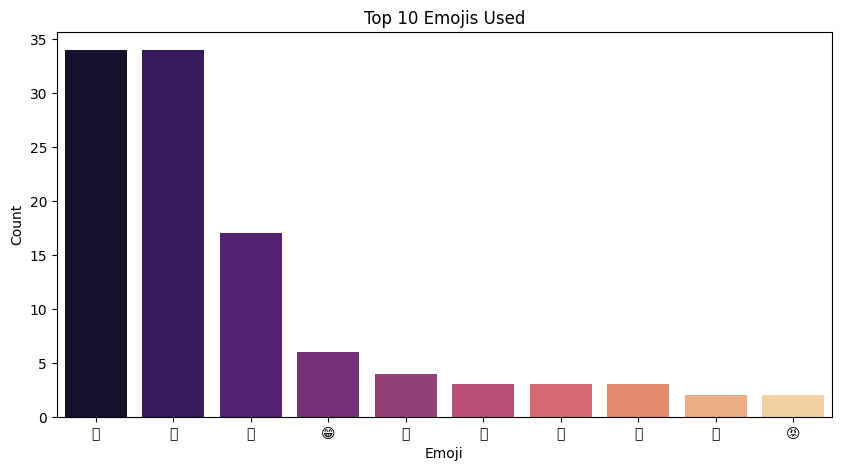

In [42]:
# Plot Top Emojis
if emoji_counter:
    most_common_emojis = emoji_counter.most_common(10)
    emojis, counts = zip(*most_common_emojis)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(emojis), y=list(counts), palette='magma')
    plt.title('Top 10 Emojis Used')
    plt.xlabel('Emoji')
    plt.ylabel('Count')
    plt.show()
else:
    print("No emojis found in chat.")

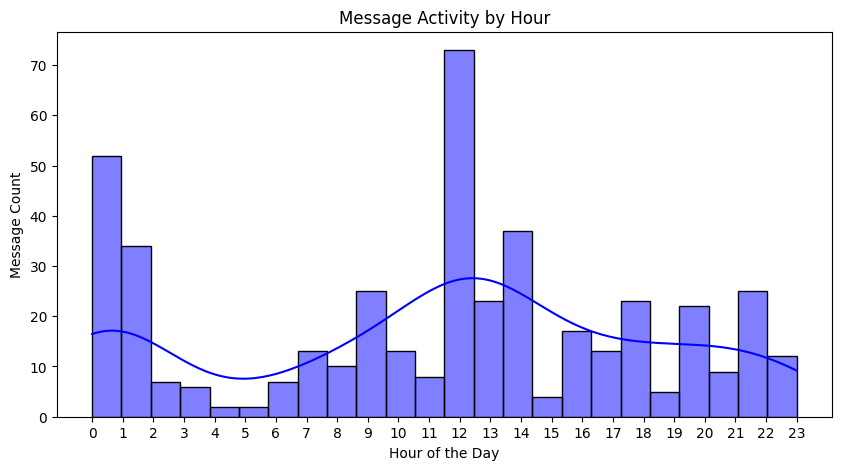

In [43]:
# Messages Over Time
chat_df['DateTime'] = pd.to_datetime(chat_df['Date'].astype(str) + ' ' + chat_df['Time'].astype(str))
chat_df['Hour'] = chat_df['DateTime'].dt.hour
plt.figure(figsize=(10,5))
sns.histplot(chat_df['Hour'], bins=24, kde=True, color='blue')
plt.title('Message Activity by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Message Count')
plt.xticks(range(0, 24))
plt.show()

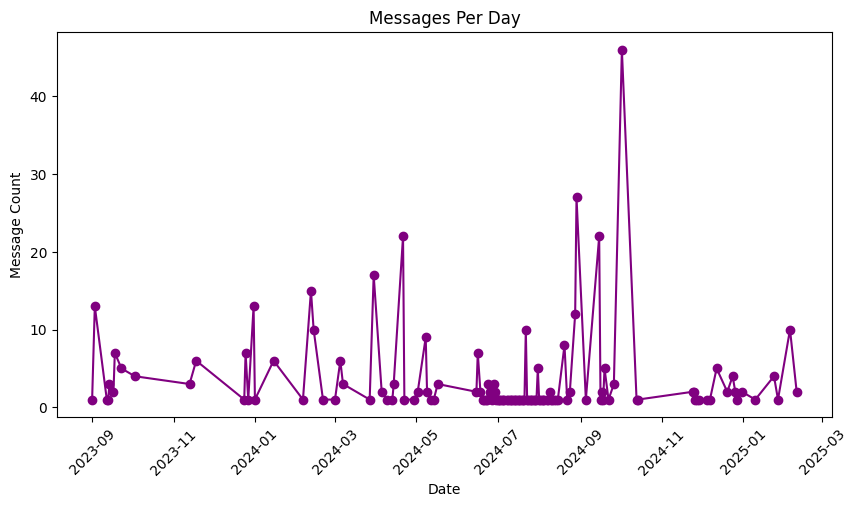

In [44]:
# Messages Per Day
chat_df['Day'] = chat_df['Date'].dt.date
plt.figure(figsize=(10,5))
chat_df.groupby('Day')['Message'].count().plot(marker='o', color='purple')
plt.title('Messages Per Day')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()


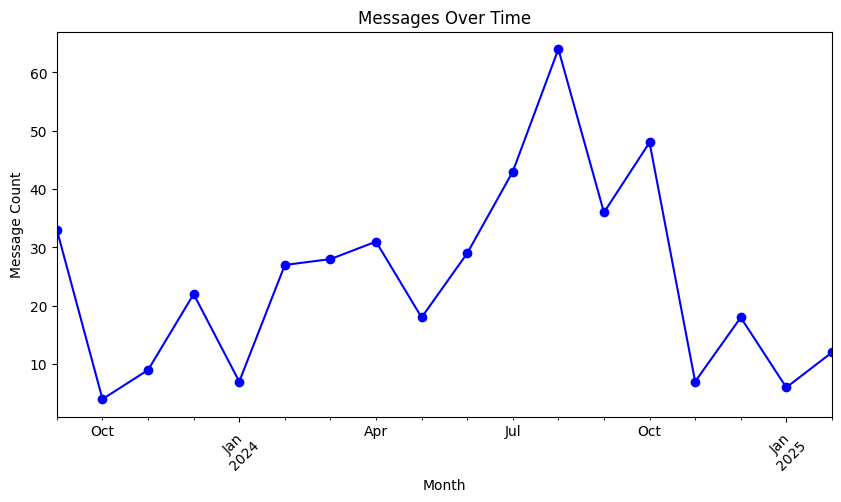

In [45]:
# Messages Over Time (Monthly Trend)
chat_df['Month'] = chat_df['Date'].dt.to_period('M')
plt.figure(figsize=(10,5))
chat_df.groupby('Month')['Message'].count().plot(marker='o', color='blue')
plt.title('Messages Over Time')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()

In [46]:
print("✅ WhatsApp Chat Analysis Complete!")


✅ WhatsApp Chat Analysis Complete!
